In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy import stats
import scipy.stats as scs
import datetime

In [2]:
du=xr.open_dataset('uwind_Ind-Pac.nc')
du_IND = du.sel(longitude=slice(30,120),latitude=slice(30,-30),time=slice('1980-01-01T00:00:00.000000000','2022-12-01T00:00:00.000000000'))
du_IND

C:\Users\DELL\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


<xarray.Dataset>
Dimensions:    (longitude: 361, latitude: 241, level: 3, expver: 2, time: 516)
Coordinates:
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * level      (level) int32 200 500 850
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2022-12-01
Data variables:
    u          (time, expver, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-06 06:07:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [3]:
du_200IND=du_IND.isel(level=0,expver=0)
du_850IND=du_IND.isel(level=2,expver=0)
du_850IND

<xarray.Dataset>
Dimensions:    (longitude: 361, latitude: 241, time: 516)
Coordinates:
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
    level      int32 850
    expver     int32 1
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2022-12-01
Data variables:
    u          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-06 06:07:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [4]:
du_200IND = du_200IND.drop(['level','expver'])
du_850IND = du_850IND.drop(['level','expver'])

In [5]:
du_850IND

<xarray.Dataset>
Dimensions:    (longitude: 361, latitude: 241, time: 516)
Coordinates:
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2022-12-01
Data variables:
    u          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-06 06:07:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [6]:
du_200IND_Jun_TS=du_200IND.groupby('time.month')[6]
du_850IND_Jun_TS=du_850IND.groupby('time.month')[6]
du_850IND_Jun_TS

<xarray.Dataset>
Dimensions:    (longitude: 361, latitude: 241, time: 43)
Coordinates:
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * time       (time) datetime64[ns] 1980-06-01 1981-06-01 ... 2022-06-01
Data variables:
    u          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-06 06:07:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [7]:
du1_200IND_Jun_TS=du_200IND_Jun_TS.astype('float64')
du1_850IND_Jun_TS=du_850IND_Jun_TS.astype('float64')
du1_200IND_Jun_TS

<xarray.Dataset>
Dimensions:    (time: 43, latitude: 241, longitude: 361)
Coordinates:
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * time       (time) datetime64[ns] 1980-06-01 1981-06-01 ... 2022-06-01
Data variables:
    u          (time, latitude, longitude) float64 24.14 24.09 ... 44.46 44.41
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-06 06:07:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [8]:
du1_850IND_Jun_TS

<xarray.Dataset>
Dimensions:    (time: 43, latitude: 241, longitude: 361)
Coordinates:
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * time       (time) datetime64[ns] 1980-06-01 1981-06-01 ... 2022-06-01
Data variables:
    u          (time, latitude, longitude) float64 0.8049 0.7479 ... 2.621 2.671
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-06 06:07:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [9]:
da = du1_200IND_Jun_TS.to_dataframe()
db = du1_850IND_Jun_TS.to_dataframe()
db

u
time       latitude longitude          
1980-06-01  30.0    30.00      0.804886
                    30.25      0.747873
                    30.50      0.645943
                    30.75      0.533646
                    31.00      0.461084
...                                 ...
2022-06-01 -30.0    119.00     2.727751
                    119.25     2.675920
                    119.50     2.629274
                    119.75     2.620636
                    120.00     2.670738

[3741043 rows x 1 columns]

In [10]:
da

u
time       latitude longitude           
1980-06-01  30.0    30.00      24.140141
                    30.25      24.086584
                    30.50      24.014023
                    30.75      23.941463
                    31.00      23.853354
...                                  ...
2022-06-01 -30.0    119.00     44.578140
                    119.25     44.548775
                    119.50     44.509037
                    119.75     44.462391
                    120.00     44.410561

[3741043 rows x 1 columns]

In [11]:
da.reset_index(inplace=True,level=['time'])

In [12]:
da['year']=pd.DatetimeIndex(da['time']).year
da

time          u  year
latitude longitude                            
 30.0    30.00     1980-06-01  24.140141  1980
         30.25     1980-06-01  24.086584  1980
         30.50     1980-06-01  24.014023  1980
         30.75     1980-06-01  23.941463  1980
         31.00     1980-06-01  23.853354  1980
...                       ...        ...   ...
-30.0    119.00    2022-06-01  44.578140  2022
         119.25    2022-06-01  44.548775  2022
         119.50    2022-06-01  44.509037  2022
         119.75    2022-06-01  44.462391  2022
         120.00    2022-06-01  44.410561  2022

[3741043 rows x 3 columns]

In [13]:
da1=da.drop(['time'], axis=1)

In [14]:
da2=da1.set_index(['year'], append=True)
da2

u
latitude longitude year           
 30.0    30.00     1980  24.140141
         30.25     1980  24.086584
         30.50     1980  24.014023
         30.75     1980  23.941463
         31.00     1980  23.853354
...                            ...
-30.0    119.00    2022  44.578140
         119.25    2022  44.548775
         119.50    2022  44.509037
         119.75    2022  44.462391
         120.00    2022  44.410561

[3741043 rows x 1 columns]

In [15]:
da2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3741043 entries, (30.0, 30.0, 1980) to (-30.0, 120.0, 2022)
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   u       float64
dtypes: float64(1)
memory usage: 46.4 MB


In [16]:
da3=da2.to_xarray()
da3

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 361, year: 43)
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * year       (year) int64 1980 1981 1982 1983 1984 ... 2019 2020 2021 2022
Data variables:
    u          (latitude, longitude, year) float64 38.9 35.95 ... 18.32 21.74

In [17]:
u200 = da3.u
u200

<xarray.DataArray 'u' (latitude: 241, longitude: 361, year: 43)>
array([[[38.9011116 , 35.95202637, 27.83211136, ..., 35.47174072,
         32.10284042, 25.64146233],
        [39.00131607, 36.04877472, 27.79928589, ..., 35.48210907,
         32.00782013, 25.51534462],
        [39.04450607, 36.15070724, 27.76300621, ..., 35.48729324,
         31.9024353 , 25.40650177],
        ...,
        [52.92956161, 65.57417297, 60.61929321, ..., 47.08667755,
         49.41726685, 44.50903702],
        [52.98484802, 65.75902557, 60.57955933, ..., 46.96401596,
         49.31533813, 44.4623909 ],
        [53.0366745 , 65.93697357, 60.53809357, ..., 46.83789825,
         49.21167755, 44.41056061]],

       [[39.2846489 , 35.88983154, 27.93404198, ..., 35.48038101,
         32.38444901, 25.49115753],
        [39.38484955, 35.96239471, 27.90812683, ..., 35.50111389,
         32.31879807, 25.36503983],
        [39.40039825, 36.03149796, 27.8580265 , ..., 35.49420166,
         32.22723389, 25.2475605 ],
...
        [15.3930912 , 17.87052917, 29.10365677, ..., 16.00813293,
         16.98770523, 20.67967606],
        [15.432827  , 17.89817238, 29.23322868, ..., 16.07896423,
         17.15355873, 20.7764225 ],
        [15.50020504, 17.93963623, 29.38353348, ..., 16.21026611,
         17.37469673, 20.90081406]],

       [[24.14014053, 27.21016121, 25.22509956, ..., 22.04278374,
         23.47499847, 19.60335541],
        [24.08658409, 27.44166374, 25.13698959, ..., 21.95121956,
         23.37134171, 19.5601635 ],
        [24.01402283, 27.64379883, 25.05924606, ..., 21.87520218,
         23.25213432, 19.51524353],
        ...,
        [16.37093735, 18.47347641, 30.16615486, ..., 17.05681038,
         17.9603672 , 21.57632065],
        [16.38302994, 18.53567123, 30.29572868, ..., 17.12591553,
         18.11758232, 21.64197159],
        [16.41758347, 18.596138  , 30.42702866, ..., 17.22612   ,
         18.32489967, 21.74217415]]])
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * year       (year) int64 1980 1981 1982 1983 1984 ... 2019 2020 2021 2022

In [18]:
do=pd.read_csv('Onset_deviation.csv')

In [19]:
dp = do.set_index(["Onset year"])
dx=dp.to_xarray()

In [20]:
dv=dx.rename({'Onset year':'year'})
dev=dv.deviation
dev

<xarray.DataArray 'deviation' (year: 43)>
array([  0,  -2,  -4,  11,  -1,  -4,   3,   1,  -7,   2, -13,   1,   4,
        -4,  -4,   7,   2,   8,   1,  -7,  -1,  -6,   8,  12,   3,   6,
        -6,  -4,  -1,  -9,  -1,  -3,   4,   0,   5,   4,   7,  -2,  -3,
         7,   0,   2,  -3], dtype=int64)
Coordinates:
  * year     (year) int64 1980 1981 1982 1983 1984 ... 2018 2019 2020 2021 2022

# reg_u200

In [21]:
reg_u200_onset = xr.cov( u200, dev, dim="year")/u200.var(dim='year',skipna=True).values
reg_u200_onset

<xarray.DataArray (latitude: 241, longitude: 361)>
array([[-0.03091885, -0.03297241, -0.03552843, ..., -0.03650421,
        -0.03436792, -0.03237902],
       [-0.03698689, -0.03885032, -0.04145483, ..., -0.03515694,
        -0.03319092, -0.03147949],
       [-0.04307842, -0.04472243, -0.04703668, ..., -0.03343016,
        -0.03176222, -0.03026205],
       ...,
       [ 0.47664132,  0.46511257,  0.45275053, ...,  0.40251277,
         0.40338012,  0.40360387],
       [ 0.49243614,  0.48087885,  0.46840982, ...,  0.40209056,
         0.40238321,  0.40266462],
       [ 0.50684866,  0.49474492,  0.48232256, ...,  0.40052677,
         0.39915354,  0.39862197]])
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0

In [27]:
db2

u
latitude longitude year          
 30.0    30.00     1980  0.804886
         30.25     1980  0.747873
         30.50     1980  0.645943
         30.75     1980  0.533646
         31.00     1980  0.461084
...                           ...
-30.0    119.00    2022  2.727751
         119.25    2022  2.675920
         119.50    2022  2.629274
         119.75    2022  2.620636
         120.00    2022  2.670738

[3741043 rows x 1 columns]

In [22]:
db.reset_index(inplace=True,level=['time'])

In [23]:
db['year']=pd.DatetimeIndex(db['time']).year

In [24]:
db1=db.drop(['time'], axis=1)

In [25]:
db2=db1.set_index(['year'], append=True)
db2

u
latitude longitude year          
 30.0    30.00     1980  0.804886
         30.25     1980  0.747873
         30.50     1980  0.645943
         30.75     1980  0.533646
         31.00     1980  0.461084
...                           ...
-30.0    119.00    2022  2.727751
         119.25    2022  2.675920
         119.50    2022  2.629274
         119.75    2022  2.620636
         120.00    2022  2.670738

[3741043 rows x 1 columns]

In [28]:
db3=db2.to_xarray()
db3

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 361, year: 43)
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * year       (year) int64 1980 1981 1982 1983 1984 ... 2019 2020 2021 2022
Data variables:
    u          (latitude, longitude, year) float64 1.674 0.7081 ... 1.645 3.061

In [30]:
u850 = db3.u
u850

<xarray.DataArray 'u' (latitude: 241, longitude: 361, year: 43)>
array([[[ 1.67388916e+00,  7.08137512e-01,  4.59356308e-01, ...,
          1.53160095e-03,  1.25234413e+00,  3.09051514e-01],
        [ 2.05915260e+00,  1.24025154e+00,  9.01632309e-01, ...,
          1.53564453e-01,  1.42510796e+00,  8.70534897e-01],
        [ 2.35976219e+00,  1.61514854e+00,  1.08476257e+00, ...,
          2.45128632e-01,  1.42338181e+00,  1.10894966e+00],
        ...,
        [ 3.93364334e+00,  7.33191490e+00,  4.68171310e+00, ...,
          4.06839943e+00,  2.57744598e+00,  2.62927437e+00],
        [ 3.99238396e+00,  7.36992264e+00,  4.66443634e+00, ...,
          4.05803490e+00,  2.68455887e+00,  2.62063599e+00],
        [ 4.08567619e+00,  7.43557358e+00,  4.65752602e+00, ...,
          4.09949875e+00,  2.80722237e+00,  2.67073822e+00]],

       [[ 7.97975540e-01,  2.96958923e-01,  1.29377365e-01, ...,
         -1.81598663e-01,  1.02083969e+00, -6.75735474e-02],
        [ 1.45275116e+00,  9.62100983e-01,  6.89132690e-01, ...,
          5.33618927e-02,  1.44238472e+00,  6.73583984e-01],
        [ 1.82419395e+00,  1.37673378e+00,  9.72465515e-01, ...,
          1.10372543e-01,  1.58750725e+00,  9.46552277e-01],
...
        [ 7.42175293e+00,  1.00010872e+00, -3.65066528e-03, ...,
          7.43902969e+00,  2.13516998e+00,  3.21840096e+00],
        [ 7.18679428e+00,  9.77649689e-01,  1.01734161e-01, ...,
          7.22480202e+00,  2.07124710e+00,  3.15620613e+00],
        [ 7.11423302e+00,  1.08821869e+00,  2.93502808e-01, ...,
          7.17297173e+00,  2.01250648e+00,  3.12856293e+00]],

       [[ 8.04885864e-01,  7.84152985e-01,  1.62897110e+00, ...,
          3.03527069e+00,  1.99004745e+00,  3.61748505e+00],
        [ 7.47873306e-01,  6.70129776e-01,  1.50630760e+00, ...,
          2.80031204e+00,  1.86392975e+00,  3.48272896e+00],
        [ 6.45942688e-01,  5.28463364e-01,  1.34045410e+00, ...,
          2.52043343e+00,  1.66870689e+00,  3.21667290e+00],
        ...,
        [ 7.72754478e+00,  1.36982346e+00, -6.75735474e-02, ...,
          6.91555405e+00,  1.79655075e+00,  3.16829872e+00],
        [ 7.64807320e+00,  1.33354378e+00,  3.25965881e-03, ...,
          6.86545181e+00,  1.74990463e+00,  3.13547325e+00],
        [ 7.42693520e+00,  1.28171349e+00,  7.58209229e-02, ...,
          6.69787025e+00,  1.64451981e+00,  3.06118584e+00]]])
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * year       (year) int64 1980 1981 1982 1983 1984 ... 2019 2020 2021 2022

# reg_u850

In [31]:
reg_u850_onset = xr.cov( u850, dev, dim="year")/u850.var(dim='year',skipna=True).values
reg_u850_onset

<xarray.DataArray (latitude: 241, longitude: 361)>
array([[-1.9342366 , -1.54386345, -1.27336315, ...,  0.41949691,
         0.41868214,  0.41724518],
       [-1.82192272, -1.19079368, -1.14781128, ...,  0.4171084 ,
         0.42062815,  0.42098111],
       [-1.43779747, -0.56253672, -0.51298099, ...,  0.41239618,
         0.42089658,  0.42467794],
       ...,
       [ 0.91863837,  0.94167687,  0.97767985, ...,  0.28351133,
         0.30394035,  0.33841838],
       [ 0.85021875,  0.86387714,  0.89212446, ...,  0.25852359,
         0.28014954,  0.30537614],
       [ 0.8013156 ,  0.80575722,  0.83360326, ...,  0.24027638,
         0.24809851,  0.26065014]])
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0

# v_wind

In [32]:
dv=xr.open_dataset('vwind_Ind-Pac.nc')
dv

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 241, level: 3, expver: 2, time: 516)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * level      (level) int32 200 500 850
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2022-12-01
Data variables:
    v          (time, expver, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-05 14:47:57 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [33]:
dv_IND=dv.sel(longitude=slice(30,120),latitude=slice(30,-30))
dv_IND

<xarray.Dataset>
Dimensions:    (longitude: 361, latitude: 241, level: 3, expver: 2, time: 516)
Coordinates:
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * level      (level) int32 200 500 850
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2022-12-01
Data variables:
    v          (time, expver, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-05 14:47:57 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [34]:
dv_200IND=dv_IND.isel(level=0,expver=0)
dv_850IND=dv_IND.isel(level=2,expver=0)
dv_850IND

<xarray.Dataset>
Dimensions:    (longitude: 361, latitude: 241, time: 516)
Coordinates:
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
    level      int32 850
    expver     int32 1
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2022-12-01
Data variables:
    v          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-05 14:47:57 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [35]:
dv_200IND = dv_200IND.drop(['level','expver'])
dv_850IND = dv_850IND.drop(['level','expver'])

In [36]:
dv_850IND

<xarray.Dataset>
Dimensions:    (longitude: 361, latitude: 241, time: 516)
Coordinates:
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2022-12-01
Data variables:
    v          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-05 14:47:57 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [37]:
dv_200IND_Jun_TS=dv_200IND.groupby('time.month')[6]
dv_850IND_Jun_TS=dv_850IND.groupby('time.month')[6]

In [38]:
dv1_200IND_Jun_TS=dv_200IND_Jun_TS.astype('float64')
dv1_850IND_Jun_TS=dv_850IND_Jun_TS.astype('float64')

In [39]:
dv1_850IND_Jun_TS

<xarray.Dataset>
Dimensions:    (time: 43, latitude: 241, longitude: 361)
Coordinates:
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * time       (time) datetime64[ns] 1980-06-01 1981-06-01 ... 2022-06-01
Data variables:
    v          (time, latitude, longitude) float64 -5.648 -5.666 ... -2.173
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-05 14:47:57 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [40]:
dq = dv1_200IND_Jun_TS.to_dataframe()
ds = dv1_850IND_Jun_TS.to_dataframe()
dq

v
time       latitude longitude           
1980-06-01  30.0    30.00      11.170857
                    30.25      11.282090
                    30.50      11.389901
                    30.75      11.476321
                    31.00      11.564452
...                                  ...
2022-06-01 -30.0    119.00      6.498206
                    119.25      6.629975
                    119.50      6.766021
                    119.75      6.896934
                    120.00      7.021858

[3741043 rows x 1 columns]

In [41]:
ds

v
time       latitude longitude          
1980-06-01  30.0    30.00     -5.648464
                    30.25     -5.666433
                    30.50     -5.689535
                    30.75     -5.638196
                    31.00     -5.541509
...                                 ...
2022-06-01 -30.0    119.00    -2.447514
                    119.25    -2.396175
                    119.50    -2.324302
                    119.75    -2.240449
                    120.00    -2.172853

[3741043 rows x 1 columns]

# v_200

In [42]:
dq.reset_index(inplace=True,level=['time'])

In [43]:
dq['year']=pd.DatetimeIndex(dq['time']).year

In [44]:
dq1=dq.drop(['time'], axis=1)

In [45]:
dq2=dq1.set_index(['year'], append=True)
dq2

v
latitude longitude year           
 30.0    30.00     1980  11.170857
         30.25     1980  11.282090
         30.50     1980  11.389901
         30.75     1980  11.476321
         31.00     1980  11.564452
...                            ...
-30.0    119.00    2022   6.498206
         119.25    2022   6.629975
         119.50    2022   6.766021
         119.75    2022   6.896934
         120.00    2022   7.021858

[3741043 rows x 1 columns]

In [46]:
dq3=dq2.to_xarray()
dq3

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 361, year: 43)
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * year       (year) int64 1980 1981 1982 1983 1984 ... 2019 2020 2021 2022
Data variables:
    v          (latitude, longitude, year) float64 0.9408 1.058 ... -3.421

In [47]:
v200 = dq3.v
v200

<xarray.DataArray 'v' (latitude: 241, longitude: 361, year: 43)>
array([[[ 0.94082201,  1.05804455, -3.42379951, ..., -1.15121865,
          7.88947725,  2.45616102],
        [ 1.06831229,  1.09997094, -3.37588358, ..., -1.09645772,
          7.78765631,  2.42535782],
        [ 1.17526734,  1.10596049, -3.33909106, ..., -1.03485155,
          7.69695807,  2.37744188],
        ...,
        [-6.23628902, -1.52941167,  1.10339367, ...,  4.11524773,
          5.26437283,  6.76602125],
        [-6.20206356, -1.49775302,  1.22061622, ...,  4.14690638,
          5.27378464,  6.89693403],
        [-6.16869354, -1.46181619,  1.33869469, ...,  4.18284321,
          5.28319693,  7.02185774]],

       [[ 0.83386695,  0.8911947 , -3.3339572 , ..., -1.0374186 ,
          8.021245  ,  2.4672842 ],
        [ 0.95964611,  0.93140996, -3.28689694, ..., -0.97837937,
          7.92969275,  2.43477011],
        [ 1.06660116,  0.94167745, -3.25609398, ..., -0.92019582,
          7.83984995,  2.3851428 ],
...
        [-2.89501381, -2.79233694, -8.27784729, ..., -4.02788162,
         -8.29153728, -3.85760927],
        [-2.88474607, -2.79319239, -8.17773724, ..., -4.10317802,
         -8.17003632, -3.68049145],
        [-2.96517611, -2.82228422, -8.09645176, ..., -4.21612215,
         -8.09473991, -3.55727911]],

       [[11.17085743, 11.87761593, 12.83507824, ...,  7.17758417,
         15.92222881, 12.48255444],
        [11.28209019, 11.98628235, 13.06781197, ...,  7.53353071,
         16.05913162, 12.53731537],
        [11.38990116, 12.08810425, 13.2988348 , ...,  7.88690996,
         16.18747711, 12.60234356],
        ...,
        [-2.76495647, -2.72816372, -8.3771019 , ..., -3.90809202,
         -8.39763641, -3.81739378],
        [-2.77351284, -2.74014282, -8.27784729, ..., -4.0133357 ,
         -8.29153728, -3.6111846 ],
        [-2.83340764, -2.75383306, -8.17260361, ..., -4.12285757,
         -8.19741726, -3.42123246]]])
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * year       (year) int64 1980 1981 1982 1983 1984 ... 2019 2020 2021 2022

# reg_v200

In [48]:
reg_v200_onset = xr.cov( v200, dev, dim="year")/v200.var(dim='year',skipna=True).values
reg_v200_onset

<xarray.DataArray (latitude: 241, longitude: 361)>
array([[ 0.07737152,  0.07931253,  0.0806399 , ..., -0.27448866,
        -0.27037621, -0.26581704],
       [ 0.08238977,  0.08372882,  0.08460484, ..., -0.25760007,
        -0.2532224 , -0.24866732],
       [ 0.08316396,  0.08332331,  0.08341461, ..., -0.24021986,
        -0.2361506 , -0.23197182],
       ...,
       [ 0.12998538,  0.12454684,  0.11984695, ..., -0.22464305,
        -0.22479255, -0.22411476],
       [ 0.13491043,  0.12863777,  0.12251326, ..., -0.21813644,
        -0.21930776, -0.2194455 ],
       [ 0.14048929,  0.13425239,  0.12751157, ..., -0.20918446,
        -0.21053299, -0.21118397]])
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0

# v_850

In [49]:
ds.reset_index(inplace=True,level=['time'])

In [50]:
ds['year']=pd.DatetimeIndex(ds['time']).year

In [51]:
ds1=ds.drop(['time'], axis=1)

In [52]:
ds2=ds1.set_index(['year'], append=True)
ds2

v
latitude longitude year          
 30.0    30.00     1980 -5.648464
         30.25     1980 -5.666433
         30.50     1980 -5.689535
         30.75     1980 -5.638196
         31.00     1980 -5.541509
...                           ...
-30.0    119.00    2022 -2.447514
         119.25    2022 -2.396175
         119.50    2022 -2.324302
         119.75    2022 -2.240449
         120.00    2022 -2.172853

[3741043 rows x 1 columns]

In [53]:
ds3=ds2.to_xarray()
ds3

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 361, year: 43)
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * year       (year) int64 1980 1981 1982 1983 1984 ... 2019 2020 2021 2022
Data variables:
    v          (latitude, longitude, year) float64 0.2058 0.04497 ... 2.957

In [54]:
v850 = ds3.v
v850

<xarray.DataArray 'v' (latitude: 241, longitude: 361, year: 43)>
array([[[ 0.20582688,  0.04496646, -0.34862804, ..., -1.34117091,
         -0.70970827, -0.80297309],
        [ 0.76712692,  0.48134303, -0.17493308, ..., -1.19571197,
         -0.59248555, -0.50007641],
        [ 1.35152924,  1.09825981, -0.05000961, ..., -0.83634305,
         -0.51633358,  0.07320261],
        ...,
        [-1.57476068,  0.5728966 , -1.96835518, ..., -2.80859399,
          0.34187365, -2.32430172],
        [-1.57818317,  0.56177318, -1.98803496, ..., -2.79575944,
          0.35385263, -2.24044895],
        [-1.58417273,  0.53695977, -2.0051477 , ..., -2.77351284,
          0.34700751, -2.17285323]],

       [[-0.12530589, -0.32210326, -0.80211747, ..., -1.28384292,
         -0.96383345, -1.06223214],
        [ 0.25802088, -0.02262914, -0.60018635, ..., -1.35058284,
         -0.87399125, -0.88511455],
        [ 0.9100188 ,  0.66102755, -0.23825049, ..., -1.00575984,
         -0.58221787, -0.22627151],
...
        [ 4.23075914,  2.59734154,  1.09055889, ...,  3.77898121,
          1.73400056,  3.19201183],
        [ 3.99374676,  2.44075918,  0.94852269, ...,  3.4966197 ,
          1.67581689,  3.09703588],
        [ 3.85684443,  2.34578323,  0.70894349, ...,  3.25532913,
          1.62961233,  2.96526718]],

       [[-5.6484642 , -5.42428637, -4.66533375, ..., -3.6043396 ,
         -5.6741333 , -4.84929609],
        [-5.66643286, -5.36182499, -4.61912918, ..., -3.59920549,
         -5.66044331, -4.70212603],
        [-5.68953514, -5.3524127 , -4.63196373, ..., -3.63856506,
         -5.6929574 , -4.56522369],
        ...,
        [ 4.28295326,  2.64183521,  0.99472725, ...,  3.5411129 ,
          1.69292986,  3.14238453],
        [ 4.11096954,  2.49124241,  0.850124  , ...,  3.37255192,
          1.64929211,  3.05938768],
        [ 3.93556309,  2.37401962,  0.64733732, ...,  3.14751863,
          1.58426344,  2.95671082]]])
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * year       (year) int64 1980 1981 1982 1983 1984 ... 2019 2020 2021 2022

# reg_v850

In [55]:
reg_v850_onset = xr.cov( v850, dev, dim="year")/v850.var(dim='year',skipna=True).values
reg_v850_onset

<xarray.DataArray (latitude: 241, longitude: 361)>
array([[-0.61081021, -0.37229777, -0.37653317, ..., -0.99017323,
        -1.04601339, -1.08387155],
       [-1.12497248, -0.52736143, -0.31869468, ..., -0.98967719,
        -1.06096672, -1.11433647],
       [-1.33035423, -0.64634435, -0.31062007, ..., -1.00904412,
        -1.09464933, -1.17332491],
       ...,
       [ 2.11667   ,  2.0229446 ,  1.89166896, ..., -1.13339577,
        -1.3132157 , -1.46283449],
       [ 2.05551745,  1.97662386,  1.84482273, ..., -1.07601798,
        -1.2377914 , -1.35459994],
       [ 1.9901149 ,  1.90821705,  1.8099159 , ..., -1.10843034,
        -1.22642902, -1.31908764]])
Coordinates:
  * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * longitude  (longitude) float64 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0

In [56]:
lat = ds3.latitude
lat

<xarray.DataArray 'latitude' (latitude: 241)>
array([-30.  , -29.75, -29.5 , ...,  29.5 ,  29.75,  30.  ])
Coordinates:
  * latitude  (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0

In [57]:
lon = ds3.longitude
lon

<xarray.DataArray 'longitude' (longitude: 361)>
array([ 30.  ,  30.25,  30.5 , ..., 119.5 , 119.75, 120.  ])
Coordinates:
  * longitude  (longitude) float64 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0

In [58]:
lon2D, lat2D = np.meshgrid(lon[::12], lat[::12])

In [59]:
lon2D, lat2D

(array([[ 30.,  33.,  36.,  39.,  42.,  45.,  48.,  51.,  54.,  57.,  60.,
          63.,  66.,  69.,  72.,  75.,  78.,  81.,  84.,  87.,  90.,  93.,
          96.,  99., 102., 105., 108., 111., 114., 117., 120.],
        [ 30.,  33.,  36.,  39.,  42.,  45.,  48.,  51.,  54.,  57.,  60.,
          63.,  66.,  69.,  72.,  75.,  78.,  81.,  84.,  87.,  90.,  93.,
          96.,  99., 102., 105., 108., 111., 114., 117., 120.],
        [ 30.,  33.,  36.,  39.,  42.,  45.,  48.,  51.,  54.,  57.,  60.,
          63.,  66.,  69.,  72.,  75.,  78.,  81.,  84.,  87.,  90.,  93.,
          96.,  99., 102., 105., 108., 111., 114., 117., 120.],
        [ 30.,  33.,  36.,  39.,  42.,  45.,  48.,  51.,  54.,  57.,  60.,
          63.,  66.,  69.,  72.,  75.,  78.,  81.,  84.,  87.,  90.,  93.,
          96.,  99., 102., 105., 108., 111., 114., 117., 120.],
        [ 30.,  33.,  36.,  39.,  42.,  45.,  48.,  51.,  54.,  57.,  60.,
          63.,  66.,  69.,  72.,  75.,  78.,  81.,  84.,  87.,  90., 

In [60]:
reg_wspd200 = np.sqrt(reg_u200_onset**2 + reg_v200_onset**2)
reg_wspd850 = np.sqrt(reg_u850_onset**2 + reg_v850_onset**2)

In [61]:
reg_wspd200, reg_wspd850

(<xarray.DataArray (latitude: 241, longitude: 361)>
 array([[0.08332063, 0.08589329, 0.08811959, ..., 0.27690537, 0.27255174,
         0.26778181],
        [0.09031115, 0.0923031 , 0.09421508, ..., 0.25998809, 0.25538838,
         0.25065194],
        [0.09365892, 0.09456675, 0.09576244, ..., 0.24253485, 0.23827703,
         0.23393743],
        ...,
        [0.49404772, 0.48149935, 0.46834425, ..., 0.46095664, 0.46178698,
         0.46165302],
        [0.51058219, 0.49778725, 0.48416656, ..., 0.45744981, 0.45826646,
         0.45857946],
        [0.52595894, 0.51263656, 0.49889302, ..., 0.45186262, 0.45127341,
         0.45110769]])
 Coordinates:
   * latitude   (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
   * longitude  (longitude) float64 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0,
 <xarray.DataArray (latitude: 241, longitude: 361)>
 array([[2.0283886 , 1.58811838, 1.32786707, ..., 1.07537002, 1.12669373,
         1.16140909],
        [2.14125325, 1.30234392, 1

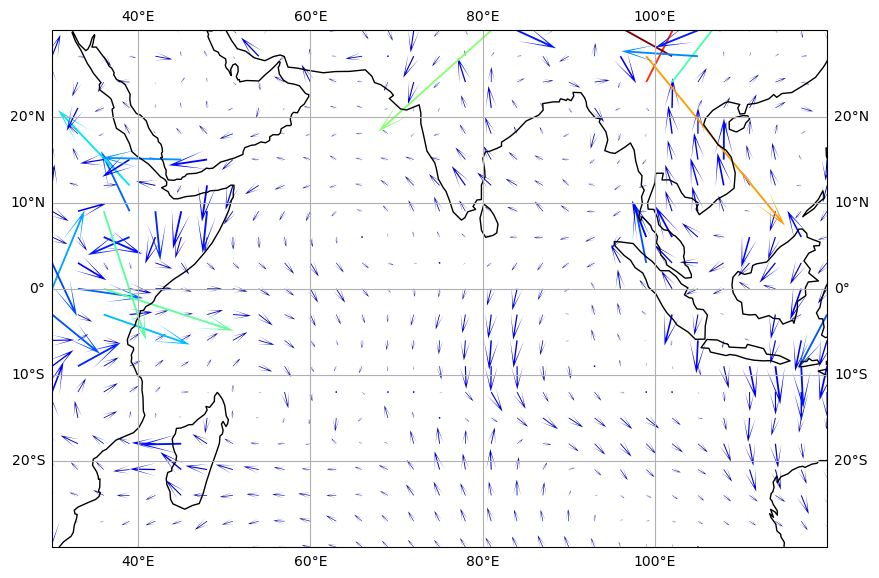

In [68]:
projection = ccrs.PlateCarree()
crs0 = ccrs.PlateCarree(central_longitude=0)     #for coding data, same as ccrs.PlateCarree()
crs180 = ccrs.PlateCarree(central_longitude=180)
fig=plt.figure(1, figsize=[10,10])
ax=plt.subplot(1,1,1,projection=projection)
ax.set_extent([30,120,-30,30], crs=crs0)

ax.coastlines()
ax.gridlines(crs=crs0, draw_labels=True)

# ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.quiver(lon2D, lat2D, reg_u850_onset[::12,::12], reg_v850_onset[::12,::12], reg_wspd850[::12,::12],angles = 'xy',cmap='jet', transform=ccrs.PlateCarree(), headwidth=10, headlength=20)

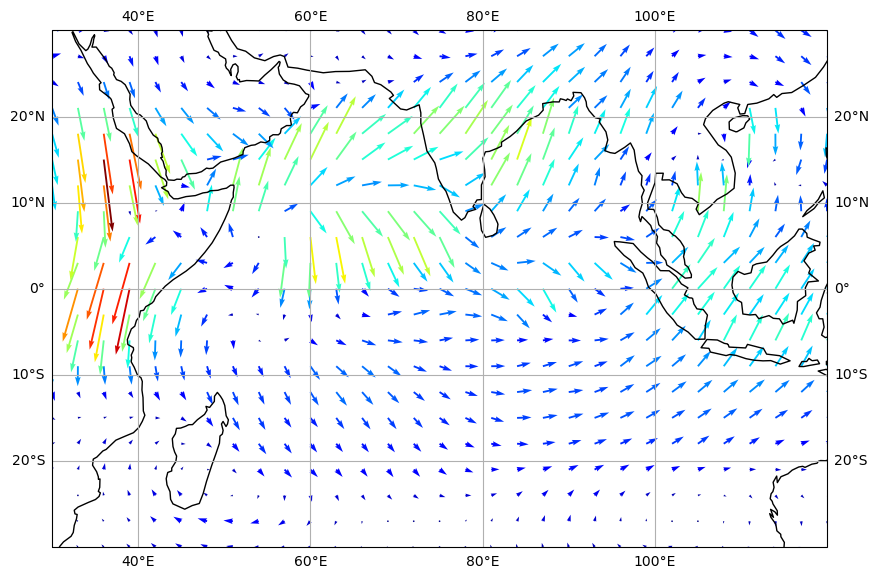

In [63]:
reg_v850_onsetprojection = ccrs.PlateCarree()
crs0 = ccrs.PlateCarree(central_longitude=0)     #for coding data, same as ccrs.PlateCarree()
crs180 = ccrs.PlateCarree(central_longitude=180)
fig=plt.figure(1, figsize=[10,10])
ax=plt.subplot(1,1,1,projection=projection)
ax.set_extent([30,120,-30,30], crs=crs0)

ax.coastlines()
ax.gridlines(crs=crs0, draw_labels=True)

# ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.quiver(lon2D, lat2D, reg_u200_onset[::12,::12], reg_v200_onset[::12,::12], reg_wspd200[::12,::12],angles = 'xy',cmap='jet', transform=ccrs.PlateCarree())

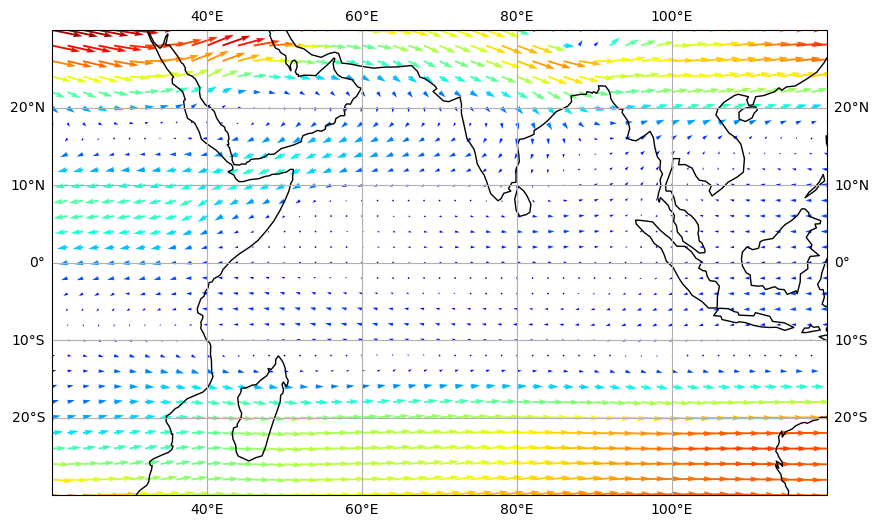

In [34]:
projection = ccrs.PlateCarree()
crs0 = ccrs.PlateCarree(central_longitude=0)     #for coding data, same as ccrs.PlateCarree()
crs180 = ccrs.PlateCarree(central_longitude=180)
fig=plt.figure(1, figsize=[10,10])
ax=plt.subplot(1,1,1,projection=projection)
ax.set_extent([20,120,-30,30], crs=crs0)

ax.coastlines()
ax.gridlines(crs=crs0, draw_labels=True)

# ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.quiver(lon2D, lat2D, u850[::8,::8], v850[::8,::8], wspd850[::8,::8],cmap='jet', transform=ccrs.PlateCarree())

In [40]:
# projection = ccrs.PlateCarree()
# crs0 = ccrs.PlateCarree(central_longitude=0)     #for coding data, same as ccrs.PlateCarree()
# crs180 = ccrs.PlateCarree(central_longitude=180)
# fig=plt.figure(1, figsize=[10,10])
# ax=plt.subplot(1,1,1,projection=projection)
# ax.set_extent([20,120,-30,30], crs=crs0)
# ax.coastlines()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.quiver(lon, lat, u, v,wspd, cmap='jet',transform=ccrs.PlateCarree())

# ax.gridlines(crs=crs0, draw_labels=True)

In [41]:
import matplotlib.cm as cm

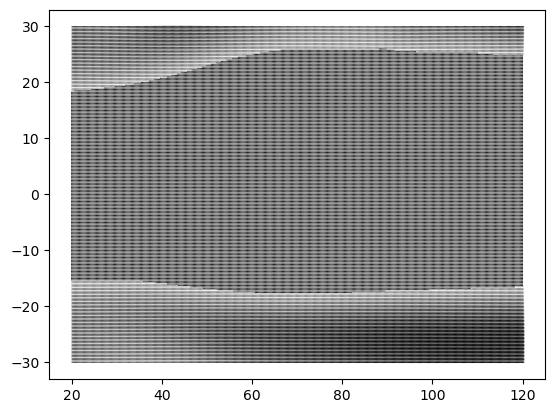

In [68]:
plt.figure()
plt.quiver(lon, lat, u, v,units='xy',cmap='jet')

NameError: name 'reg_u' is not defined

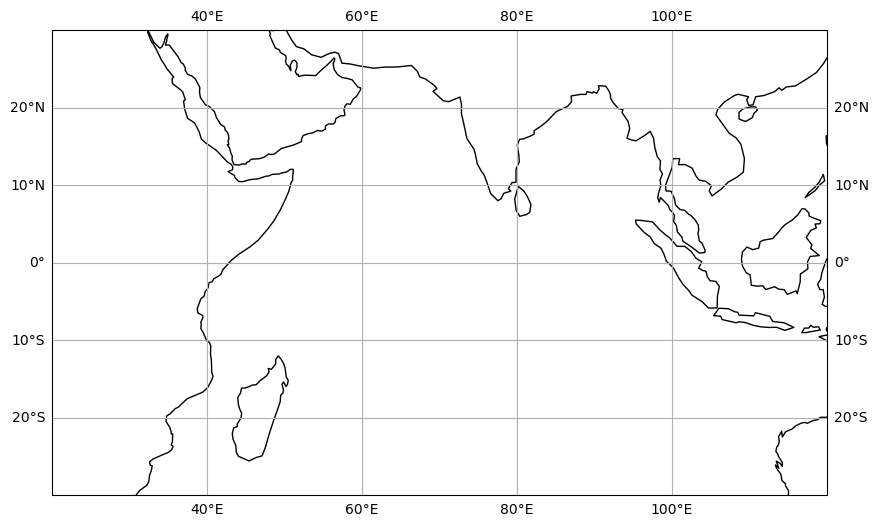

In [58]:
projection = ccrs.PlateCarree()
crs0 = ccrs.PlateCarree(central_longitude=0)     #for coding data, same as ccrs.PlateCarree()
crs180 = ccrs.PlateCarree(central_longitude=180)
fig=plt.figure(1, figsize=[10,10])
ax=plt.subplot(1,1,1,projection=projection)
ax.set_extent([20,120,-30,30], crs=crs0)

ax.coastlines()
ax.gridlines(crs=crs0, draw_labels=True)

# ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.quiver(lon, lat, reg_u, reg_v, wspd, angles = 'xy',cmap='jet', transform=ccrs.PlateCarree())

In [45]:
conda install -c conda-forge metpy

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\DELL\anaconda3

  added / updated specs:
    - metpy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    importlib_resources-5.12.0 |     pyhd8ed1ab_0          30 KB  conda-forge
    metpy-1.4.0                |     pyhd8ed1ab_0         316 KB  conda-forge
    pint-0.20.1                |     pyhd8ed1ab_0         207 KB  conda-forge
    pooch-1.7.0                |     pyhd8ed1ab_0          49 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         603 KB

The following NEW packages will be INSTALLED:

  importlib_resourc~ conda-forge/noarch::importlib_resources-5.12.0-pyhd8ed1ab_0 
  metpy              conda-forge/noarch::metpy-1.4.0-pyhd8ed1ab_0 
  pint               conda-fo